## Expectation Plot

The purpose of this plot is to show the expected return in terms of tanks for buying a certain number of boxes.
The error bars are very conservative since this is quite a flaky stochastic process and are set to 1 sigma.

### Scenario 1

- You own all previously available tanks


In [35]:
from collections import defaultdict
from matplotlib import pyplot as plt
from multiprocessing import Pool
from importlib import reload
from copy import deepcopy

from wot import montecarlo, visualize
from wot.implementations.pandora_tiered import pandora_config, NPurchasedTarget

# Set up configuration
# For our first experiment assume we have all previously available vehicles
config = deepcopy(pandora_config)
config.preowned_vehicles = {
    "proto": 7,
    "alpha": 4
}

N = 500
n_proto_purchased = range(50, 1001, 5)

def process_n_proto(n_proto):
    states_for_n_proto = []
    target_fn = NPurchasedTarget(n_proto=n_proto)
    for _ in range(N):
        state = montecarlo.montecarlo_for_target(config, target_fn=target_fn)
        states_for_n_proto.append(state)
    return (n_proto, states_for_n_proto)

with Pool() as pool:
    results = pool.map(process_n_proto, n_proto_purchased)

# Convert results back to original states format
states = defaultdict(list)
for n_proto, states_for_n_proto in results:
    states[n_proto] = states_for_n_proto
        

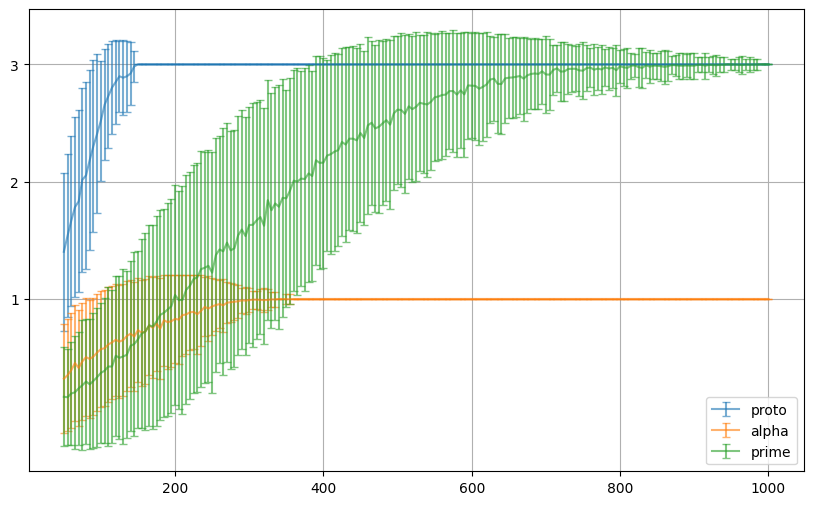

In [36]:
fn_get_result = lambda state: {
    "proto": state.received_vehicles.get("proto", 0),
    "alpha": state.received_vehicles.get("alpha", 0),
    "prime": state.received_vehicles.get("prime", 0),  
}

fig, ax = plt.subplots(figsize=(10, 6))
fig, ax = visualize.expectation_plot(states, fn_get_result=fn_get_result, ax=ax, yticks=[1, 2, 3])


ax.grid(True)
_ = ax.legend()

### Scenario 2

- Non of the previously available tanks are owned

In [37]:
# Set up configuration
# For our first experiment assume we have all previously available vehicles
config = deepcopy(pandora_config)
config.preowned_vehicles = {
    "proto": 0,
    "alpha": 0
}

N = 500
n_proto_purchased = range(50, 1001, 5)

def process_n_proto(n_proto):
    states_for_n_proto = []
    target_fn = NPurchasedTarget(n_proto=n_proto)
    for _ in range(N):
        state = montecarlo.montecarlo_for_target(config, target_fn=target_fn)
        states_for_n_proto.append(state)
    return (n_proto, states_for_n_proto)

with Pool() as pool:
    results = pool.map(process_n_proto, n_proto_purchased)

# Convert results back to original states format
states = defaultdict(list)
for n_proto, states_for_n_proto in results:
    states[n_proto] = states_for_n_proto

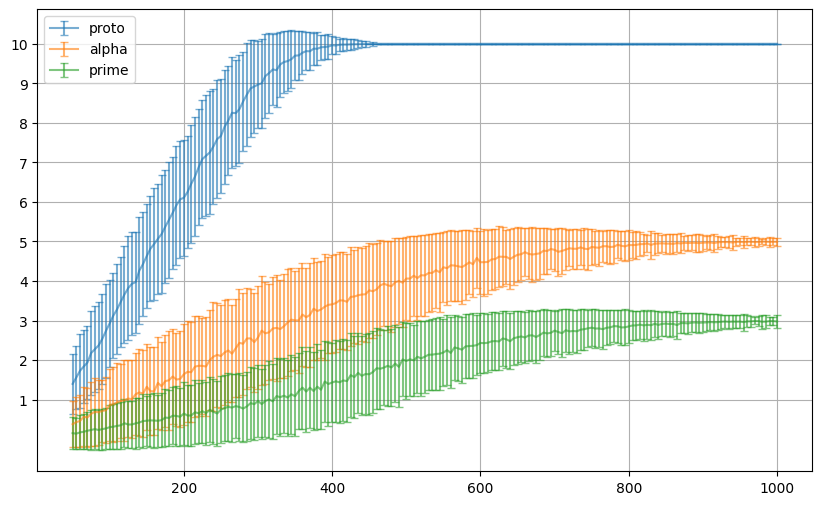

In [39]:
fn_get_result = lambda state: {
    "proto": state.received_vehicles.get("proto", 0),
    "alpha": state.received_vehicles.get("alpha", 0),
    "prime": state.received_vehicles.get("prime", 0),  
}

fig, ax = plt.subplots(figsize=(10, 6))
fig, ax = visualize.expectation_plot(states, fn_get_result=fn_get_result, ax=ax, yticks=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])


ax.grid(True)
_ = ax.legend()